In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
rng = np.random.default_rng(12345)

In [ ]:
class Room(object):
    def __init__(self, h, w, c):
        self.update_hwc(h,w,c)
    def update_hwc(self, h, w, c):
        self.h = h
        self.w = w
        self.c = c
        self.vertecies = c + np.array([[w, h],[-w,h],[-w,-h],[w,-h]])/2
        
    def update_vertex(self, vertex_list):
        self.vertecies = vertex_list
        
        

In [2]:
def split_room(room, axis, corridor_w):
    min_, max_ = np.min(room[:,axis]),np.max(room[:,axis])
    split = rng.random()*(max_-min_)+min_
    room1 = room.copy()
    result = []
    room1[room1[:,axis]==min_,axis] = split+corridor_w/2
    room2 = room.copy()
    room2[room2[:,axis]==max_,axis] = split-corridor_w/2
    return [room1, room2]
    

In [3]:
room_h = 15
room_w = 12

main_room = np.array([[room_w,room_h],[-room_w,room_h],[-room_w,-room_h],[room_w,-room_h]])/2

axis = 1
corridor_w = 1


rooms = []
new_rooms = []

rooms.append(main_room)
for room in rooms:
    new_rooms+=split_room(room, axis, corridor_w)
rooms = new_rooms

new_rooms = []
axis = 1 - axis
for room in rooms:
    new_rooms+=split_room(room, axis, corridor_w)
rooms = new_rooms

new_rooms = []
axis = 1 - axis
for room in rooms:
    new_rooms+=split_room(room, axis, corridor_w)
rooms = new_rooms

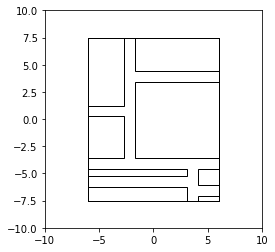

In [4]:
plot_rooms = [main_room]+rooms
fig, ax = plt.subplots()
for r in plot_rooms:
    polygon = Polygon(r, fill=False)
    ax.add_patch(polygon)
plt.xlim([-10,10])
plt.ylim([-10,10])
ax.set_aspect('equal', 'box')
plt.show()

In [6]:
polygon.get_xy()

array([[ 4.,  5.],
       [-4.,  5.],
       [-4., -5.],
       [ 4., -5.],
       [ 4.,  5.]])